# Eksakt løsning av TSP

## Problemdefinisjon
Gitt et sett av byer og distansene mellom hvert par av byer, finn den korteste ruten som besøker alle byene nøyaktig én gang, og som returnerer til startpunktet. 

### Vokabular
- Et sett av byer: Vi trenger å representere et sett av byer. En by kan representeres som en dataklasse, og samlingen av byer representereres i en liste eller et sett. 
- Distansen mellom hvert par av byer: Hvis $A$ og $B$ er byer, så kan distansen finnes gjennom en funksjon (`distance(A,B)`) eller en ved et oppslag i en tabell (`distance[A][B]`).
- En by: Alt vi trenger å vite om en by er hvor langt unna den er de andre byene. Kan representeres som en et heltall (0,1,2,...) som er en indeks i en tabell, eller så kan den være et par av (x,y)-koordinater. 
- En rute: Dette er rekkefølgen vi besøker byene i, og kan representeres som en liste. For eksmepel `[B,D,A,C]`, som betyr at vi reiser fra B til D, D til A, A til C, og til slutt tilbake til B fra C. 
- Kortest mulige rute: Dette er ruten med minst distanse av alle ruter. 
- Rutedistanse: Summen av distanser per strekning i ruten. Kan representeres som en funksjon `tour_length(tour)`.

Nå har vi definert byggeklossene vi trenger for å angripe dette problemet. 

### Løsning
Vi definerer først en by ved klassen `City` som kjennetegnes av et (x,y)-koordinat. Vi definerer også en funksjon `distance` for å finne avstanden mellom to byer.

In [5]:
from dataclasses import dataclass
import numpy as np

@dataclass(eq=True, frozen=True) # setting eq=True and frozen=True makes class immutable and hashable
class City:
    "A city has a (x,y)-coordinate and a name"
    x: float
    y: float
    name: str = ""


def distance(A: City, B: City): 
    "The euclidian distance between two cities"
    return np.sqrt((A.x - B.x)**2 + (A.y - B.y)**2)

A = City(3,0)
B = City(0,4)

# distance should be sqrt(25) = 5
assert distance(A,B) == 5


La oss så definere en funksjon for å initiere et sett med byer:

In [10]:
import random 

seed = 42
np.random.seed(seed)

def generate_cities(n, width=900, height=600, seed=seed) -> list[City]:
    "Make a set of n cities, each with random coordinates within a (width x height) rectangle."
    random.seed(seed * n)
    return frozenset(City(x = random.randrange(width), y = random.randrange(height), name = chr(c + 97).upper())
                    for c in range(n))

generate_cities(5)

frozenset({City(x=172, y=20, name='C'),
           City(x=234, y=40, name='E'),
           City(x=393, y=7, name='A'),
           City(x=671, y=296, name='D'),
           City(x=696, y=415, name='B')})

In [11]:
import itertools, time

def all_tour_combinations(cities: list):
    "Returns all possible combinations of items in the inputed list"
    return itertools.permutations(cities)

def total_distance(tour):
    "The total of distances between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

def shortest_tour(tours: list) -> list:
    "Returns the shortest tour in the list of tours by evaluating value of the total_distance function"
    return list(min(tours, key=total_distance))

def valid_tour(tour: list[City], cities: list[City]):
    """
    Validates that the tour is valid.
    Each tour must contain each city exactly once. 
    """
    return set(tour) == set(cities) and len(tour) == len(cities)

def exact_solution(cities: list[City]): 
    "Generate all possible tours of the cities and choose the shortest tour."
    t0 = time.time()
    route = shortest_tour(all_tour_combinations(cities))
    t1 = time.time()
    return route, t1-t0

In [12]:
number_of_cities = 8
cities = generate_cities(number_of_cities)
tour, seconds = exact_solution(cities)
length = total_distance(tour)

print("{} city tour with total distance {:.1f} found in {:.2f} seconds: {}"
        .format(len(cities), length, seconds, " -> ".join([c.name for c in tour])))

8 city tour with total distance 2509.3 found in 0.62 seconds: A -> B -> H -> F -> D -> E -> C -> G


Ok, flott! Vi har et svar. Men er det riktig? La oss plotte dette for å se om det gir mening! 

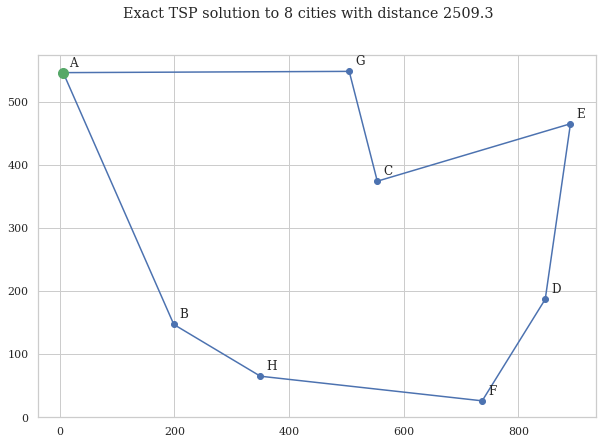

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme(style="whitegrid")
sns.set_context('notebook')
plt.rc('font', family='serif')

def plot_tour(tour: list[City]): 
    start = tour[0]
    total_tour = tour + [start]
    xs = [c.x for c in total_tour]
    ys = [c.y for c in total_tour]

    fig, ax = plt.subplots(figsize=(10,10/1.5))
    ax.plot(xs, ys, "bo-")
    
    # mark the start as a big green circle
    ax.plot(start.x, start.y, 'go', markersize = 10)

    # annotate each point with the name of the cities
    names = [c.name for c in tour]
    for i, txt in enumerate(names):
        ax.annotate(txt, (xs[i] + 10, ys[i] + 10))

    fig.suptitle("Exact TSP solution to {} cities with distance {:.1f}".format(len(tour), total_distance(tour)))


plot_tour(tour)

Vi kan altså finne eksakt løsning for et ganske lite antall byer med brute force-algoritmen vår. Men med en gang vi øker $n$ merker du fort at det er umulig å løse dette problemet på denne måten, siden tiden for å løse problemet øker proporsjonalt med $n!$ (antall kombinasjoner av byer). Hvis vi derimot kan nøye oss med en ikke-optimal, men god nok løsning, kan bio-inspirert AI og andre søksbaserte optimeringsteknikker være gode å ha i ermet! 